In [9]:
import folium 
import pandas as pd
import seaborn as sns

In [7]:
import sys
sys.path.append('../scripts/')

from data_extraction import DataExtraction
dextract = DataExtraction()


In [8]:
df = dextract.load_data('../data/features.csv')
df.head()

,id,order_id,driver_id,driver_action,lat,lng,order_origin,trip_origin,trip_destination,trip_Start_time,trip_end_time,driver_order_dst,trip_dstance,trip_time
0,1,392001,243828,accepted,6.602207,3.270465,"(6.6022066, 3.2704649)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,693.62,21048.29,217.0
1,2,392001,243588,rejected,6.592097,3.287445,"(6.5920972, 3.2874447)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,1554.09,21048.29,217.0
2,3,392001,243830,rejected,6.596133,3.281784,"(6.5961334, 3.2817841)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,788.35,21048.29,217.0
3,4,392001,243539,rejected,6.596142,3.280526,"(6.5961416, 3.2805263)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,694.07,21048.29,217.0
4,5,392001,171653,rejected,6.609232,3.288800,"(6.6092317, 3.2887999)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,1623.33,21048.29,217.0


### plot driver distance vs acceptance rate

In [63]:
df_acc = df.groupby(['order_id','driver_action']).agg({'driver_order_dst':['mean']}).reset_index()
df_acc['dod'] = df_acc['driver_order_dst']['mean']

df_new = pd.DataFrame()
df_new['order_id'] = df_acc['order_id']
df_new['driver_action'] = df_acc['driver_action']
df_new['dod'] = df_acc['dod']
# df_acc.drop(columns='driver_order_dst')
df_new.columns

Index(['order_id', 'driver_action', 'dod'], dtype='object')

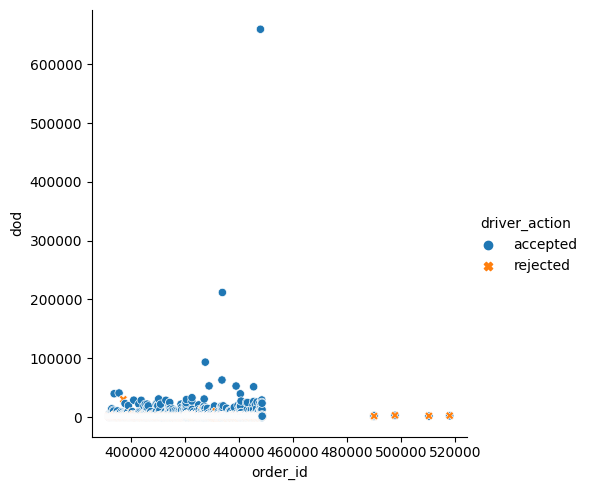

In [67]:
sns.relplot(
    data=df_new,
    x="order_id", y="dod", hue="driver_action", style="driver_action"
)

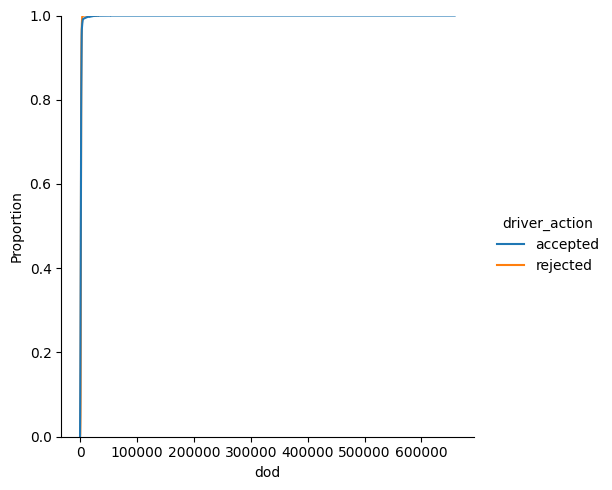

In [64]:
sns.displot(df_new, x="dod", hue="driver_action", kind="ecdf")